In [3]:
from datetime import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statistics import mean 

import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

In [4]:
# Read user data for each hour (Wikipedia clickData from 2015)
df = pd.read_csv(r'../data/projectcount_wikiDE_2014.csv')
clickData_hourly_2014 = df["de"]

df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly = df["De"].tolist()
clickData_hourly_2015 = clickData_hourly[24:] + clickData_hourly[0:24]

df = pd.read_csv(r'../data/DE_2020.csv')
ci_data = df['carbon_intensity_avg']

df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021 = df['carbon_intensity_avg']

year=2014
weekday_frequency = weekdayfrequency(year)
s = weekday_frequency.index(53)*24


# Carbon Intensity 2021 Heatmap

In [5]:
daily_ci_2021 = [0]*24
for i in range(24):
    temp = []
    for j in range(364):
        temp.append(ci_data_2021[i+(24*j)])
    daily_ci_2021[i] = temp

(array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334]),
 [Text(0, 0, 'Jan'),
  Text(31, 0, 'Feb'),
  Text(59, 0, 'Mar'),
  Text(90, 0, 'Apr'),
  Text(120, 0, 'May'),
  Text(151, 0, 'Jun'),
  Text(181, 0, 'Jul'),
  Text(212, 0, 'Aug'),
  Text(243, 0, 'Sep'),
  Text(273, 0, 'Oct'),
  Text(304, 0, 'Nov'),
  Text(334, 0, 'Dec')])

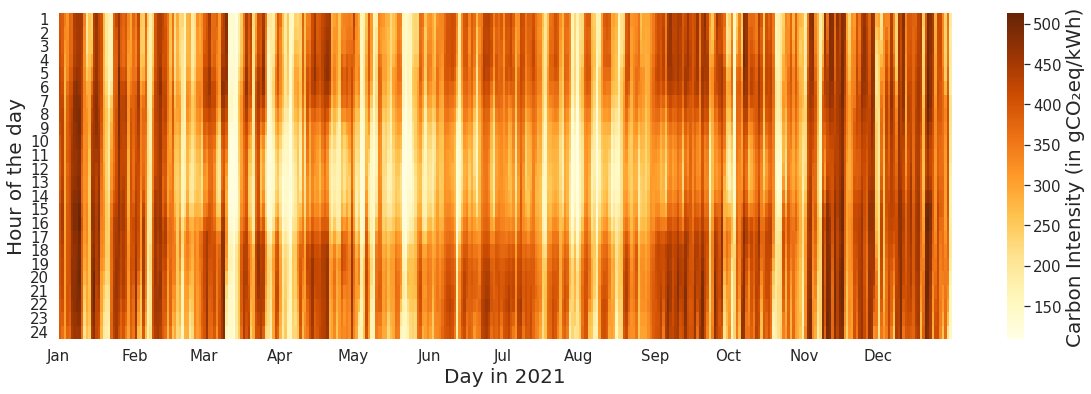

In [78]:
sns.set(rc={'figure.figsize':(20,6)})
# Datetime Axis
base = datetime(2021, 1, 1)
dates = base + (np.arange(365) * timedelta(days=1))

DaysMonths = [0,31,28,31,30,31,30,31,31,30,31,30]

for  i in range(1,len(DaysMonths)):
    DaysMonths[i] = DaysMonths[i-1] + DaysMonths[i]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ci_heatmap = sns.heatmap(daily_ci_2021, cmap="YlOrBr", cbar_kws={'label': 'Carbon Intensity (in gCO₂eq/kWh)'})

cbar = ci_heatmap.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)
ci_heatmap.figure.axes[-1].yaxis.label.set_size(20)

ci_heatmap.set_xlabel('Day in 2021', fontdict={'size': 20})
ci_heatmap.set_ylabel('Hour of the day', fontdict={'size': 20})

ci_heatmap.set_yticklabels([i for i in range(1,25)],fontdict={'size': 15})

ci_heatmap.set_xticks(DaysMonths)
ci_heatmap.set_xticklabels(months,fontdict={'size': 15})
plt.xticks(rotation=0)

In [79]:
fig_user = ci_heatmap.get_figure()
fig_user.savefig("../img/DE21CI.jpg", bbox_inches = 'tight')

# Heatmap Energy Budget

In [46]:
data, vars_ms, userMax, energyDemand, q = getConstantsFromBPMN('../flightBooking.json')

carbonBudget = calcCarbonBudgetHourInWeekAVG(2020,clickData_hourly_2014,ci_data)

weekday_frequency = weekdayfrequency(2021)
s_2021 = weekday_frequency.index(53)*24

indices = []
for ms in data['components']:
    indices.append([0] * len(data['components'][ms]))
eb = []
for t in range(len(ci_data_2021)):
    index = (t+s_2021)%168
    eb.append(carbonBudget[index]/ci_data_2021[t])

daily_eb_2021 = [0]*24
for i in range(24):
    temp = []
    for j in range(364):
        temp.append(eb[i+(24*j)] / 1000)
    daily_eb_2021[i] = temp

(array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334]),
 [Text(0, 0, 'Jan'),
  Text(31, 0, 'Feb'),
  Text(59, 0, 'Mar'),
  Text(90, 0, 'Apr'),
  Text(120, 0, 'May'),
  Text(151, 0, 'Jun'),
  Text(181, 0, 'Jul'),
  Text(212, 0, 'Aug'),
  Text(243, 0, 'Sep'),
  Text(273, 0, 'Oct'),
  Text(304, 0, 'Nov'),
  Text(334, 0, 'Dec')])

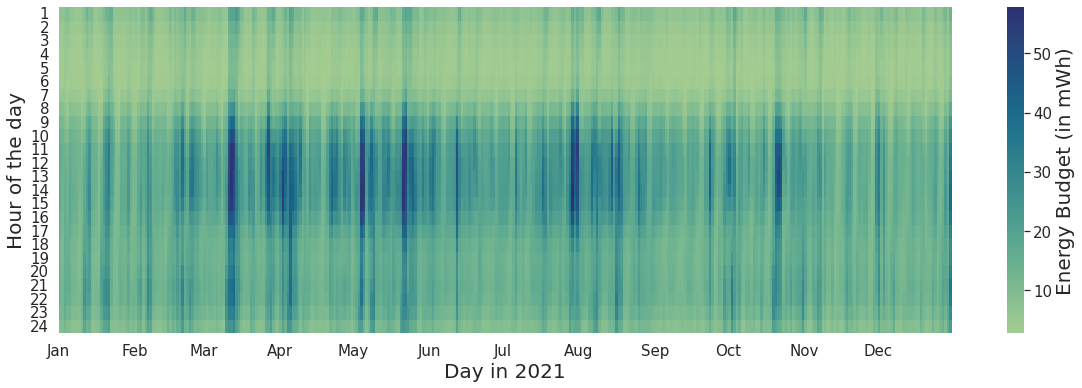

In [76]:
sns.set(rc={'figure.figsize':(20,6)})
# Datetime Axis
base = datetime(2021, 1, 1)
dates = base + (np.arange(365) * timedelta(days=1))

DaysMonths = [0,31,28,31,30,31,30,31,31,30,31,30]

for  i in range(1,len(DaysMonths)):
    DaysMonths[i] = DaysMonths[i-1] + DaysMonths[i]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
eb_heatmap = sns.heatmap(daily_eb_2021, cmap="crest", cbar_kws={'label': 'Energy Budget (in mWh)'})

cbar = eb_heatmap.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)
eb_heatmap.figure.axes[-1].yaxis.label.set_size(20)



eb_heatmap.set_xlabel('Day in 2021', fontdict={'size': 20})
eb_heatmap.set_ylabel('Hour of the day', fontdict={'size': 20})

eb_heatmap.set_yticklabels([i for i in range(1,25)],fontdict={'size': 15})

eb_heatmap.set_xticks(DaysMonths)
eb_heatmap.set_xticklabels(months,fontdict={'size': 15})


plt.xticks(rotation=0)

In [77]:
fig_user = eb_heatmap.get_figure()
fig_user.savefig("../img/DE21EB.jpg", bbox_inches = 'tight')

# User Click-rate Data (Hour in Week AVG over year)

In [8]:
print(len(clickData_hourly_2014)-len(clickData_hourly_2015))
print(sum(clickData_hourly_2015)-sum(clickData_hourly_2014))
print((sum(clickData_hourly_2014)-sum(clickData_hourly_2015))/sum(clickData_hourly_2014)*100)

0
-1620275609
15.285388741897577


/tmp/ipykernel_60134/288505130.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00],fontdict={'size': 15})


[Text(0, 200000.0, '0'),
 Text(0, 400000.0, '0.5'),
 Text(0, 600000.0, '0.75'),
 Text(0, 800000.0, '1.0'),
 Text(0, 1000000.0, '1.25'),
 Text(0, 1200000.0, '1.5'),
 Text(0, 1400000.0, '1.75'),
 Text(0, 1600000.0, '2.0'),
 Text(0, 1800000.0, ''),
 Text(0, 2000000.0, '')]

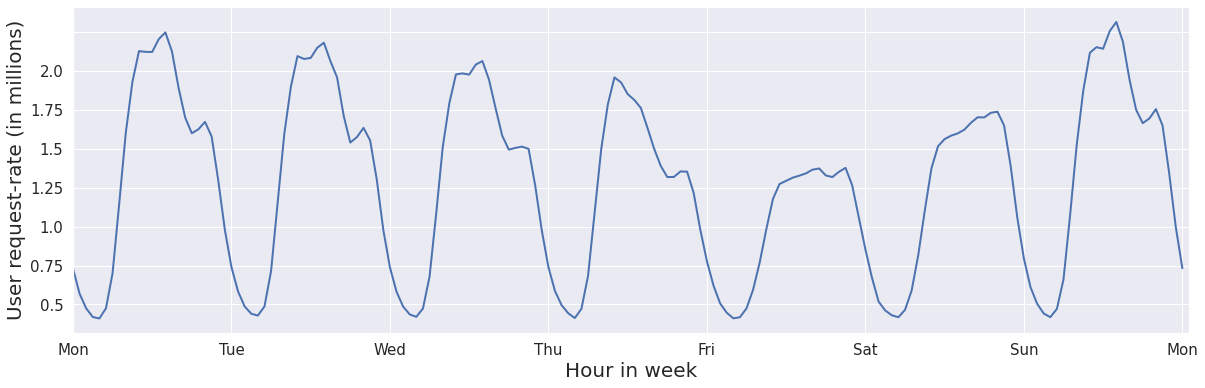

In [9]:
#s_hourlyAVG = getS_hourlyAVG(clickData_hourly, year)
s_hourly = [0] * 168
for i in range(len(clickData_hourly)):
    hourInWeek = (i+s) % 168
    s_hourly[hourInWeek] += clickData_hourly[i]

s_hourlyAVG = [0] * 168
for i in range(7):
    for j in range(24):
        index = (i*24)+j
        s_hourlyAVG[index] = s_hourly[index] / weekday_frequency[i]
s_hourlyAVG.append(s_hourlyAVG[0])

sns.set(rc={'figure.figsize':(20,6)})
ax = sns.lineplot(data=s_hourlyAVG, linewidth=2)
plt.xticks([i*24 for i in range(8)])

#plt.yticks([5500000 + (i*500000) for i in range(8)])
ax.set(xlim=(0,169))
weekDays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']
ax.set_xticklabels(weekDays,fontdict={'size': 15})
ax.set_xlabel('Hour in week', fontdict={'size': 20})
ax.set_ylabel('User request-rate (in millions)', fontdict={'size': 20})
ax.set_yticklabels([0, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00],fontdict={'size': 15})

In [10]:
fig_user = ax.get_figure()
fig_user.savefig("../img/user-clickRate-avgWeekly_2014.png", bbox_inches = 'tight')

# CI-Data (Hour in Week AVG over year)

In [11]:
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2020_hourly = df['carbon_intensity_avg']

weekday_frequency = weekdayfrequency(2021)
ci_data_2020_hourlyInWeek_avg = [0] * 168
## We start Wednesday (01.01.2020) and end Thursday (31.12.2020)

s = weekday_frequency.index(53)*24 #starting hour in week of year ToDo what about leap yeear?
ci_hourly = [0] * 168
for i in range(len(ci_data_2020_hourly)):
    hourInWeek = (i+s) % 168
    ci_hourly[hourInWeek] += ci_data_2020_hourly[i]

ci_hourlyAVG = [0] * 168
for i in range(7):
    for j in range(24):
        index = (i*24)+j
        ci_hourlyAVG[index] += ci_hourly[index] / weekday_frequency[i]

Text(0, 0.5, 'Carbon Intensity (gCO2eq/kWh)')

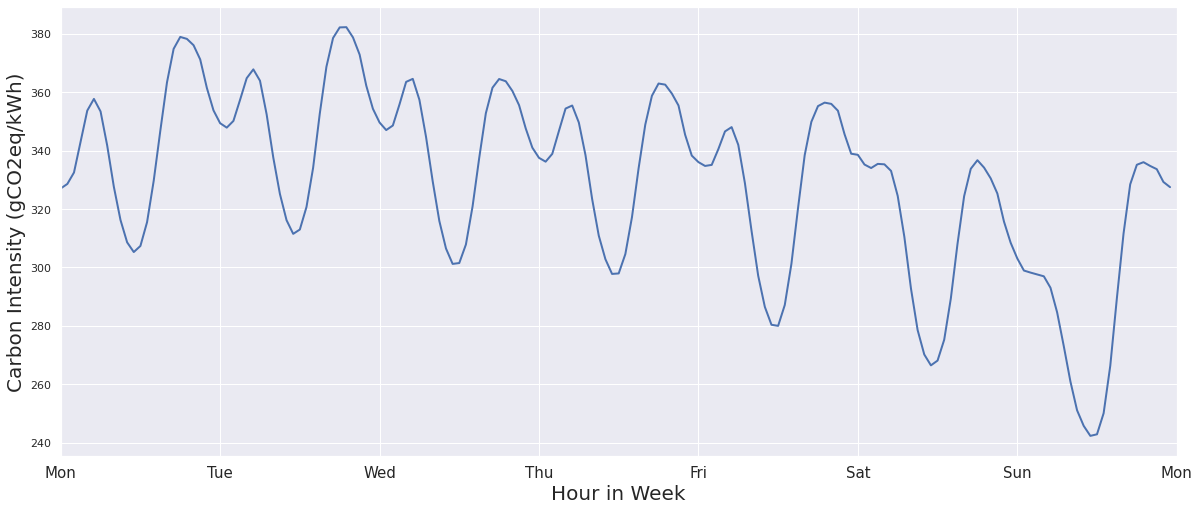

In [12]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.lineplot(data=ci_hourlyAVG, linewidth=2)
plt.xticks([i*24 for i in range(8)])
#plt.yticks([5500000 + (i*500000) for i in range(8)])
ax.set(xlim=(0,168))
ax.set_xticklabels(weekDays,fontdict={'size': 15})
ax.set_xlabel('Hour in Week', fontdict={'size': 20})
ax.set_ylabel('Carbon Intensity (gCO2eq/kWh)', fontdict={'size': 20})
#ax.set_title('Mean carbon intensity per Hour in Week', fontdict={'size': 24, 'weight': 'bold'})

In [13]:
fig = ax.get_figure()
fig.savefig("../img/ci-avgWeekly_2021.png")

# Energy Demand (Hour in Week AVG over year)

In [14]:
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data = df['carbon_intensity_avg']


s_hourlyAVG = getS_hourlyAVG(clickData_hourly, year)
weekday_frequency = weekdayfrequency(year)
s = weekday_frequency.index(53)*24

#energyBudget_annually_2021 = 18018969861.040535 * 0.92 # ToDo recalulate and add to lib.py
#eb_perUser = energyBudget_annually_2021 / user_total_annually
#eb_perHour = [s_hourlyAVG[i] * eb_perUser for i in range(len(s_hourlyAVG))]

user_total_annually = sum(clickData_hourly)
carbonEmission = calcCarbonEmissionFromEnergyDemand(calcEnergyDemandFromAVG(clickData_hourly),ci_data)
carbonEmission = sum(carbonEmission) # / 8784)* 8760 # Leap Year

carbonBudget_anually = carbonEmission * 0.922
cb_perUser = carbonBudget_anually / user_total_annually
cb_perHour = [s_hourlyAVG[i] * cb_perUser for i in range(len(s_hourlyAVG))]

# Because the cb_perHour is static, we can adjust it with the CI for 2021
energyBudget = [0 for i in range(168)]
for t in range(len(ci_data)):
    index = (t+s) % 168 # 01.01.2021 was a Friday and 31.12.2021 was a Friday
    energyBudget[index] += cb_perHour[index] / ci_data[t]

Text(0, 0.5, 'Energy Demand (in GWh)')

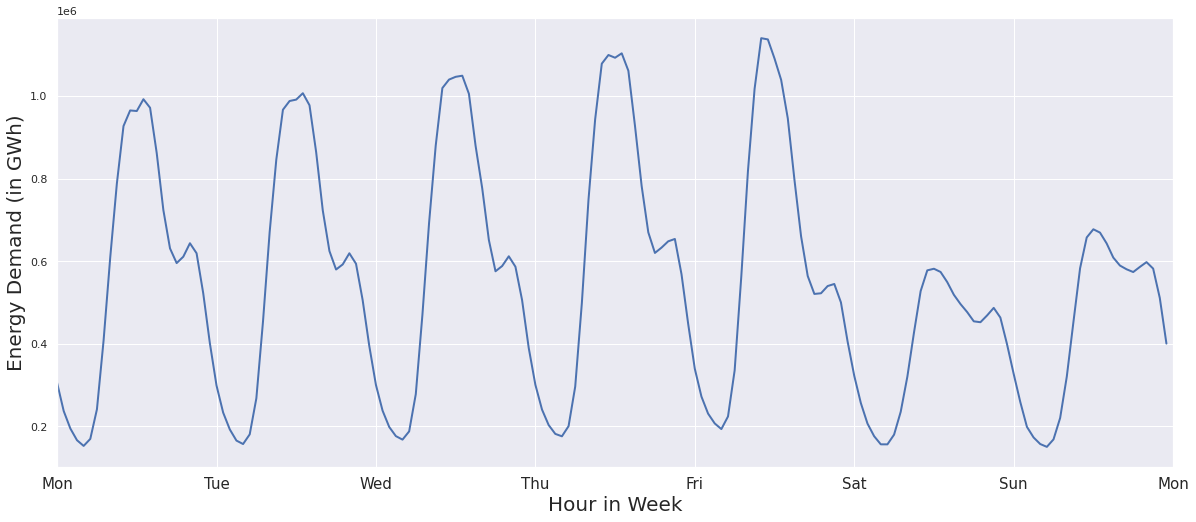

In [15]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.lineplot(data=energyBudget, linewidth=2)
plt.xticks([i*24 for i in range(8)])
#plt.yticks([5500000 + (i*500000) for i in range(8)])
ax.set(xlim=(0,168))
ax.set_xticklabels(weekDays,fontdict={'size': 15})
ax.set_xlabel('Hour in Week', fontdict={'size': 20})
ax.set_ylabel('Energy Demand (in GWh)', fontdict={'size': 20})
#ax.set_title('Mean carbon intensity per Hour in Week', fontdict={'size': 24, 'weight': 'bold'})

In [16]:
fig = ax.get_figure()
fig.savefig("../img/ed-totalWeekly_2020.png")

# Carbon Budget (Hour in Week AVG over year)

/tmp/ipykernel_60134/3195681021.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_cb.set_yticklabels(cb_num,fontdict={'size': 15})


[Text(0, 1000000.0, '0'),
 Text(0, 2000000.0, '2'),
 Text(0, 3000000.0, '3'),
 Text(0, 4000000.0, '4'),
 Text(0, 5000000.0, '5'),
 Text(0, 6000000.0, '6'),
 Text(0, 7000000.0, '7'),
 Text(0, 8000000.0, '')]

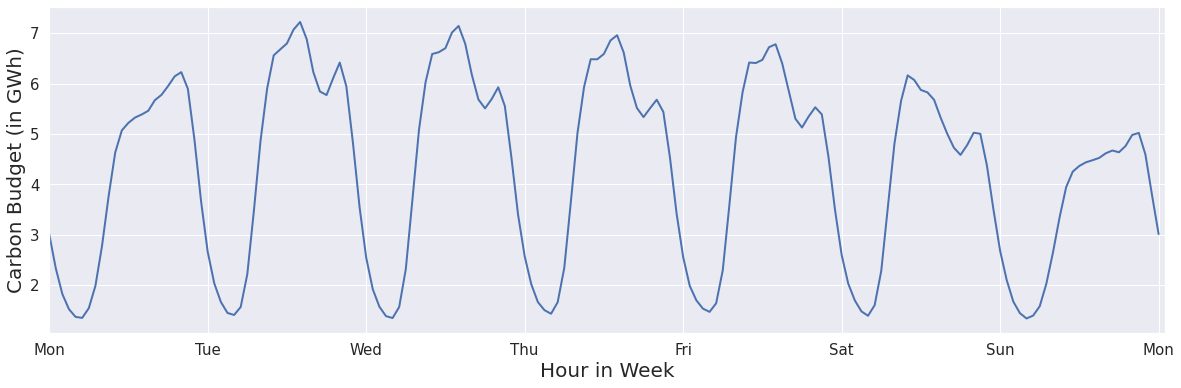

In [17]:
df = pd.read_csv(r'../data/projectcount_wikiDE_2014.csv')
clickData_hourly_2014 = df["de"]

df = pd.read_csv(r'../data/DE_2020.csv')
ci_data_2020_hourly = df['carbon_intensity_avg']


cb_perHour = calcCarbonBudgetHourInWeekAVG(2020,clickData_hourly_2014,ci_data_2020_hourly)
cb_perHour.append(cb_perHour[0])

sns.set(rc={'figure.figsize':(20,6)})
ax_cb = sns.lineplot(data=cb_perHour, linewidth=2)
plt.xticks([i*24 for i in range(8)])
#plt.yticks([5500000 + (i*500000) for i in range(8)])
ax_cb.set(xlim=(0,169)) # ,ylim=(0,25000)
weekDays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']
ax_cb.set_xticklabels(weekDays,fontdict={'size': 15})
ax_cb.set_xlabel('Hour in Week', fontdict={'size': 20})
ax_cb.set_ylabel('Carbon Budget (in GWh)', fontdict={'size': 20})
cb_num = [0,2,3,4,5,6,7]
ax_cb.set_yticklabels(cb_num,fontdict={'size': 15})
#ax_eb.set_title('Mean energy budget per Hour in Week', fontdict={'size': 24, 'weight': 'bold'})

In [18]:
fig_eb = ax_cb.get_figure()
fig_eb.savefig("../img/cb-avgWeekly_2021.png", bbox_inches = 'tight')

# User-Request Data (Boxplot Weekly) - 2015

In [19]:
DaysMonths = [31,28,31,30,31,30,31,31,30,31,30,31]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sIndex = 0
optiBox = []

#data = pd.DataFrame({'Month', 'Hourly Optimization Approach': optiBox, 'Simple carbon-aware'})
for i in range(0,53):
    optiBox.append(clickData_hourly_2015[sIndex:sIndex+(7*24)])
    sIndex += 7*24
flat_optiBox = [item for sublist in optiBox for item in sublist]
index_labels = [item for item in range(0,53) for _ in range(len(optiBox[item]))]
print(len(flat_optiBox),len(index_labels))
df = pd.DataFrame({'Week in 2015': index_labels, 'User-requests (in millions)': flat_optiBox, 'Approach': ['Hourly Optimization Approach'] * len(flat_optiBox)})

8760 8760


Text(0, 0.5, 'User-requests (in millions)')

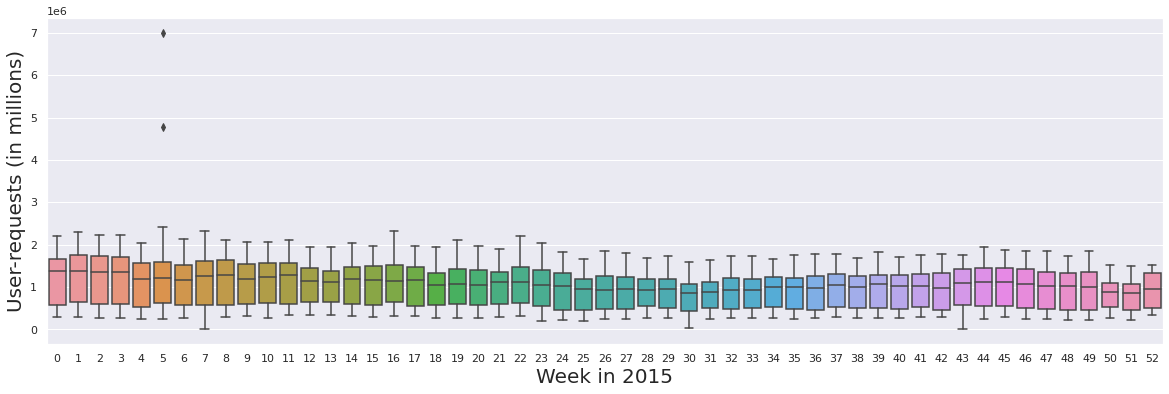

In [20]:
compareOptimalSimpleBox =sns.boxplot(x='Week in 2015', y='User-requests (in millions)', data=df)
compareOptimalSimpleBox.set_xlabel('Week in 2015',fontdict={'size': 20})
compareOptimalSimpleBox.set_ylabel('User-requests (in millions)',fontdict={'size': 20})

In [21]:
fig = compareOptimalSimpleBox.get_figure()
fig.savefig("../img/users2015_boxplot_weekly.png", bbox_inches = 'tight')